# Car Price Prediction

# Loading & Preparation

In [1]:
# import important libs

import pandas as pd
import numpy as np
#import wget

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#wget.download('https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/chapter-02-car-price/data.csv')

In [3]:
# accessing data and loading it as DataFrame

data = 'data/car_prices.csv'
df = pd.read_csv(data)

In [4]:
# checking 1st 5 rows

df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
# checking number of rows and cols

df.shape

(11914, 16)

In [6]:
# lowercase column names and replace spaces ' ' with underscores '_'

df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [7]:
# checking datatypes

df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [8]:
# finding 'object' or strongs to lower case them and replace ' ' with '_'

df.dtypes == 'object'

make                  True
model                 True
year                 False
engine_fuel_type      True
engine_hp            False
engine_cylinders     False
transmission_type     True
driven_wheels         True
number_of_doors      False
market_category       True
vehicle_size          True
vehicle_style         True
highway_mpg          False
city_mpg             False
popularity           False
msrp                 False
dtype: bool

In [9]:
df.dtypes[df.dtypes == 'object']

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [10]:
# since 'df.dtypes[df.dtypes == 'object']' returns Series with Index (column names) and Values (objects),
# we need to filter out column names only to run a loop on them later

df.dtypes[df.dtypes == 'object'].index

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [11]:
# filtering columns with object datatype, because we cannot apply string methods to non-string values

string_columns = list(df.dtypes[df.dtypes == 'object'].index)
string_columns

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [12]:
# lowercase values and replace spaces ' ' with underscores '_'

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [13]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


# Exploratory data analysis

In [14]:
# checking missing values

df.isna().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [15]:
for col in df.columns:
    print(col, df[col].nunique())

make 48
model 914
year 28
engine_fuel_type 10
engine_hp 356
engine_cylinders 9
transmission_type 5
driven_wheels 4
number_of_doors 3
market_category 71
vehicle_size 3
vehicle_style 16
highway_mpg 59
city_mpg 69
popularity 48
msrp 6049


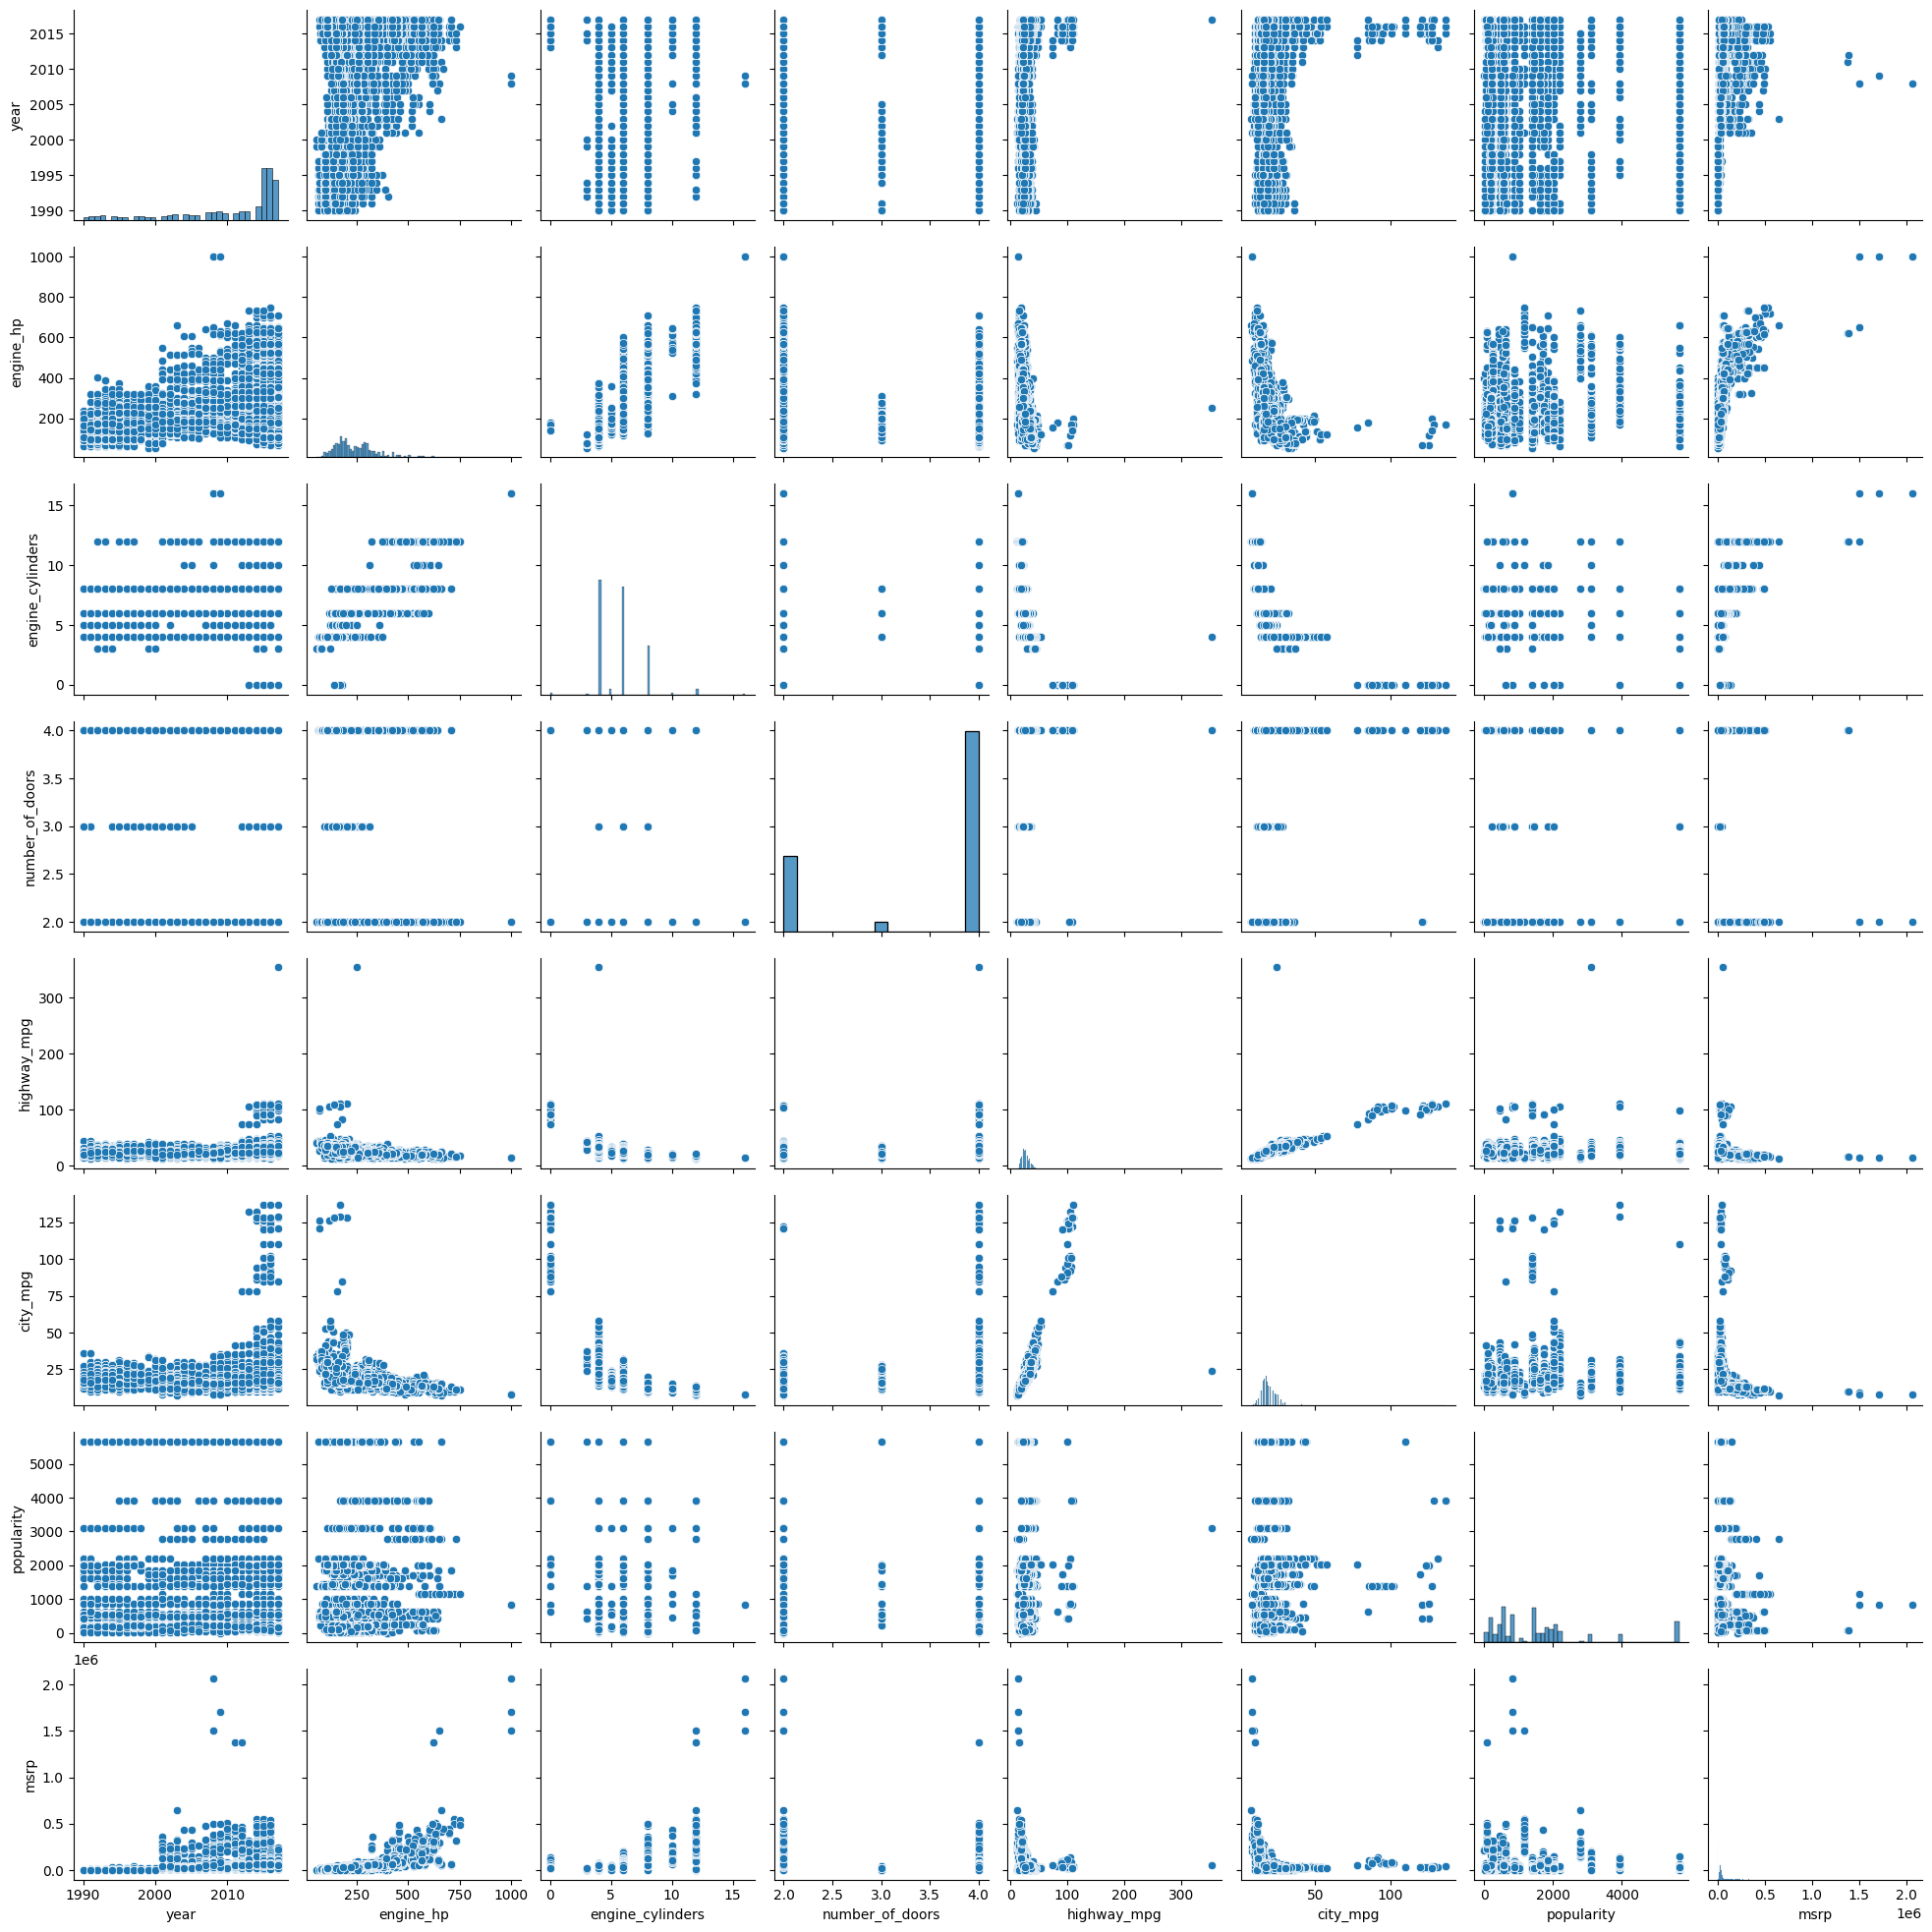

In [16]:
# create plot of pairwise relationships

sns.pairplot(df)

<Axes: xlabel='msrp', ylabel='Count'>

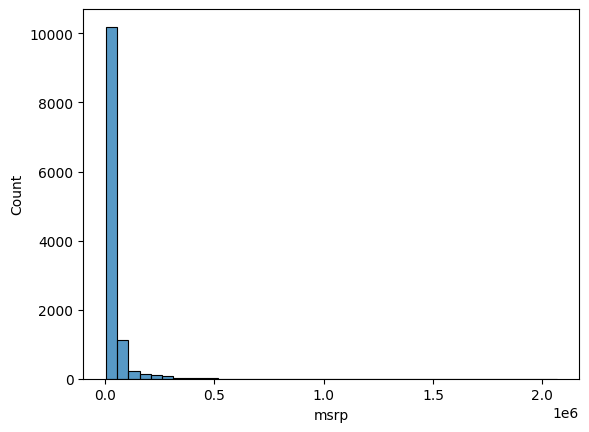

In [17]:
# visualisation of car price distribution (mspr column) 

sns.histplot(df.msrp, bins=40)

<Axes: xlabel='msrp', ylabel='Count'>

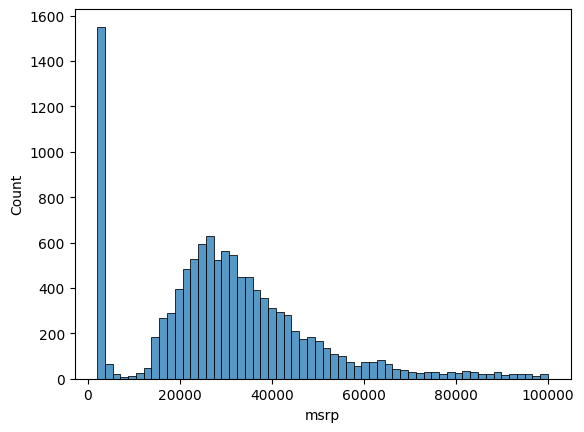

In [18]:
# visualisation of car price distribution (mspr column) 

sns.histplot(df.msrp[df.msrp <= 100000])

<Axes: xlabel='msrp', ylabel='Count'>

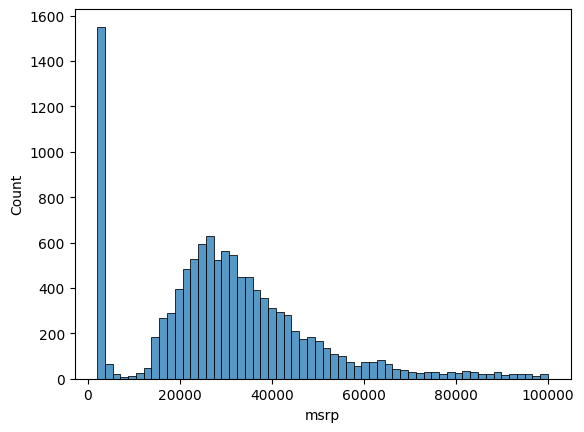

In [19]:
# visualisation of car price distribution (mspr column) 

sns.histplot(df.msrp[(df.msrp <= 100000) & (df.msrp > 0)])

In [20]:
# mean

df.msrp.mode()

0    2000
Name: msrp, dtype: int64

<Axes: xlabel='msrp', ylabel='Count'>

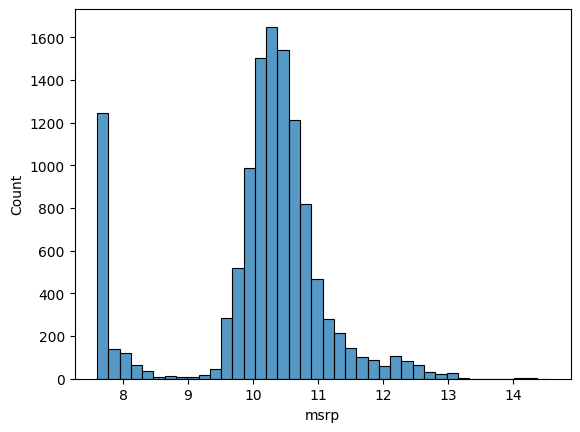

In [21]:
#now we have kind of normal distribution, which we may use for prediction
#(long-tail distributions oftentimes confuse models)

log_price = np.log1p(df.msrp)

sns.histplot(log_price, bins=40)

# Setting Up The Validation Framework

We'll divide our dataset for 60% / 20% / 20% - training, validation, testing datasets

In [22]:
# checking the lenght of the dataset

len(df)

11914

In [23]:
# checking how many observations we'll get as a 20%

len(df) * 0.2

2382.8

In [24]:
# dividing the dataset for 60/20/20%

n = len(df)
n_val = int(n * 0.2) # we convert it to integer
n_test = int(n * 0.2)
n_train = n - (n_val + n_test)

In [25]:
# checking if we included all the observations

n, n_val + n_test + n_train

(11914, 11914)

In [26]:
# checking datasets sizes

n_val, n_test, n_train

(2382, 2382, 7150)

In [27]:
# we want to shuffle the dataset in case there is some kind of order

np.random.seed(2) #setting up a seed in order to make this reproducible

idx = np.arange(n) # we generate a sequence of numbers from 0 to 11913
np.random.shuffle(idx) #shuffling
idx #checking shuffled index

array([2735, 6720, 5878, ..., 6637, 2575, 7336])

In [28]:
# checking shuffled dataset

df.iloc[idx]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,chevrolet,chevy_van,1998,regular_unleaded,200.0,6.0,automatic,rear_wheel_drive,3.0,NaN,midsize,cargo_van,18,13,1385,2052
11798,subaru,xv_crosstrek,2014,regular_unleaded,160.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hybrid",compact,4dr_suv,33,29,640,25995
6637,dodge,magnum,2006,regular_unleaded,250.0,6.0,automatic,all_wheel_drive,4.0,NaN,large,wagon,22,15,1851,29100
2575,honda,civic,2016,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,42,31,2202,22200


In [29]:
# checking training dataset

idx[:n_train]

array([2735, 6720, 5878, ..., 9334, 5284, 2420])

In [30]:
# example: it takes 1st 10 rows in shuffled order

df.iloc[idx[:10]]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
8001,volkswagen,rabbit,2008,regular_unleaded,170.0,5.0,manual,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,29,22,873,17575
2882,bentley,continental_gtc,2013,premium_unleaded_(required),500.0,8.0,automatic,all_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,24,14,520,191400
649,bmw,6_series,2015,premium_unleaded_(required),315.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,coupe,32,21,3916,76100
616,maybach,57,2012,premium_unleaded_(required),543.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury",large,sedan,16,10,67,379050
4459,ford,f-150_heritage,2004,regular_unleaded,202.0,6.0,manual,four_wheel_drive,2.0,NaN,large,regular_cab_pickup,18,13,5657,26030


In [31]:
# creating datasets

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]


In [32]:
# checking their lenght

len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [33]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [34]:
# resetting the index

df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [35]:
# normalizing the price column, i.e. our target and transforming Series to NumPy array using .values

y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [36]:
# deliting these price values from datasets, so not to use it accidently

del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [37]:
# checking
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


# Linear Regression

In [38]:
def train_linear_regression(X, y):
    # adding dummy columns with ones (because we'll use w0 and wn as a single vector)
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    # normal equation formula
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    # return the weights vector into the bias and the rest of weights
    return w[0], w[1:]

# Baseline model

In [39]:
# selecting few basic features to use

base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [40]:
df[base].isnull().sum()

engine_hp           69
engine_cylinders    30
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [41]:
# filling nulls with zeros and transforming into NumPy array using .values

def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [42]:
# prepare our features matrix X
# calculating our weights using train_linear_regression function

X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [43]:
# saving our predictions to a variable

y_pred = w_0 + X_train.dot(w)

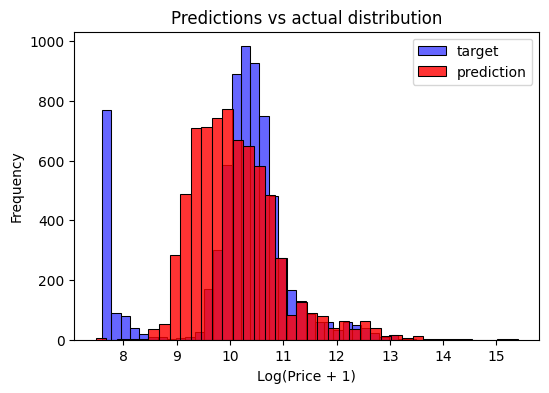

In [44]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='blue', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='red', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

# Baseline model: Statsmodels

In [45]:
#from sklearn.model_selection import train_test_split

In [46]:
# Import ols() function from statsmodels package
from statsmodels.formula.api import ols
import statsmodels.api

In [47]:
# Write out OLS formula as a string
ols_formula = "msrp ~ engine_hp + engine_cylinders + highway_mpg + city_mpg + popularity"

In [48]:
# Create OLS dataframe

X2_train = pd.DataFrame(X_train)
X2_train = X2_train.rename(columns={0: "engine_hp", 1: "engine_cylinders", 2: "highway_mpg",\
                                   3: "city_mpg", 4: "popularity"})
y2_train = pd.DataFrame(y_train)
y2_train = y2_train.rename(columns={0: "msrp"})
'''
ols_data = df[:n_train+n_test]
'''

# Create OLS dataframe
ols_data = pd.concat([X2_train, y2_train], axis = 1)

# Create OLS object and fit the model
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()

In [49]:
# Get model results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   msrp   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     1698.
Date:                Sat, 12 Aug 2023   Prob (F-statistic):               0.00
Time:                        13:58:24   Log-Likelihood:                -8140.0
No. Observations:                7150   AIC:                         1.629e+04
Df Residuals:                    7144   BIC:                         1.633e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            7.9273      0.062    127.779      0.000       7.806       8.049
engine_hp            0.0097      0.000     74.848      0.000       0.009       0.010
engine_cylinders    -0.1591      0.009    -17.311      0.000      -0.177      -0.141
highway_mpg          0.0144      0.002      7.419      0.000       0.011       0.018
city_mpg             0.0149      0.002      7.685      0.000       0.011       0.019
popularity       -9.069e-06   6.24e-06     -1.454      0.146   -2.13e-05    3.16e-06
==============================================================================
Omnibus:                     1249.179   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2116.043
Skew:                          -1.151   Prob(JB):                         0.00
Kurtosis:                       4.343   Cond. No.                     1.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
# https://stackoverflow.com/questions/52562664/regression-model-statsmodel-python

ypred = model.predict(X2_train)

In [51]:
ypred

0        9.547928
1        9.387340
2        9.671978
3        8.654388
4       10.866020
          ...    
7145    10.593528
7146    10.111199
7147    10.304230
7148    11.977891
7149     9.998631
Length: 7150, dtype: float64

In [52]:
from statsmodels.tools.eval_measures import rmse

# calc rmse
rmse_ols = rmse(y_train, ypred)

In [53]:
rmse_ols

0.7554192603920132

# Root Mean Squared Error (RMSE)

RMSE tells us how large the errors our model makes

In [45]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [46]:
rmse(y_train, y_pred)

0.7554192603920132

In [47]:
# prepare validation dataset

X_val = prepare_X(df_val)

# make predictions on validation dataset
y_pred = w_0 + X_val.dot(w)

In [48]:
rmse(y_val, y_pred)

0.7616530991301603

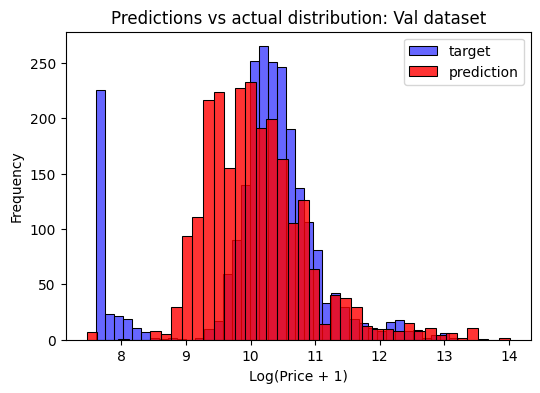

In [49]:
plt.figure(figsize=(6, 4))

sns.histplot(y_val, label='target', color='blue', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='red', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution: Val dataset')

plt.show()

# Simple feature engineering

In [56]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [59]:
# prepare our features matrix X
# calculating our weights using train_linear_regression function

X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

# prepare validation dataset

X_val = prepare_X(df_val)

# make predictions on validation dataset
y_pred = w_0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5172055461058318

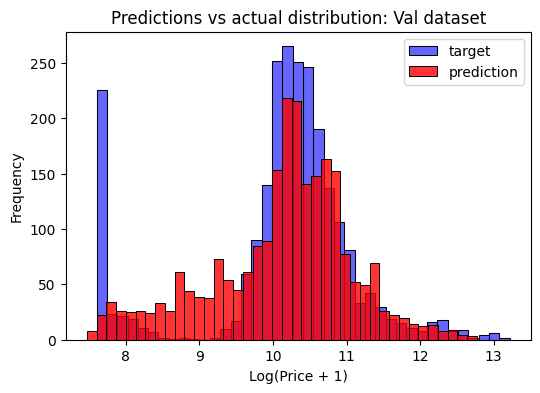

In [60]:
plt.figure(figsize=(6, 4))

sns.histplot(y_val, label='target', color='blue', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='red', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution: Val dataset')

plt.show()

# Simple feature engineering: categorical variables

In [61]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [62]:
df_train.number_of_doors.value_counts()

4.0    5000
2.0    1916
3.0     228
Name: number_of_doors, dtype: int64

Example of One Hot Encoding: Manually via Loop

In [75]:
ds = df_train.copy()
features = base.copy()

In [81]:
for v in [2, 3, 4]:
    print('Starting %s' %v)
    feature = 'num_doors_%s' % v
    ds[feature] = (ds['number_of_doors'] == v).astype(int)
    features.append(feature)
    print('Finished %s' %v)

Starting 2
Finished 2
Starting 3
Finished 3
Starting 4
Finished 4


In [77]:
ds.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_2,num_doors_3,num_doors_4
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,1,0,0
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,0,0,1
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,0,0,1
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,0,1,0
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,0,0,1


Finished example

In [84]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)

    for v in ['front_wheel_drive', 'rear_wheel_drive', 'all_wheel_drive', 'four_wheel_drive']:
        feature = 'is_driven_wheens_%s' % v
        df[feature] = (df['driven_wheels'] == v).astype(int)
        features.append(feature)

    for v in ['crossover', 'flex_fuel', 'luxury', 'luxury,performance', 'hatchback']:
        feature = 'is_mc_%s' % v
        df[feature] = (df['market_category'] == v).astype(int)
        features.append(feature)

    for v in ['compact', 'midsize', 'large']:
        feature = 'is_size_%s' % v
        df[feature] = (df['vehicle_size'] == v).astype(int)
        features.append(feature)

    for v in ['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback']:
        feature = 'is_style_%s' % v
        df[feature] = (df['vehicle_style'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [85]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 29.393541944243218
validation: 26.96777045595001


Our Weights are extremely high

In [87]:
int(w_0)

-10216597817214906

In [90]:
w

array([-2.04039782e-01,  1.02771489e+01, -9.84593600e-03,  1.65796873e+00,
       -4.74991623e-03, -6.86684617e-01,  2.83737465e+02,  2.76443243e+02,
        2.77763881e+02,  8.09414816e-01,  1.97063593e+01, -1.69824493e+01,
       -2.56230216e+00,  5.98804208e+00, -3.57487780e+01, -3.37209784e+01,
       -3.92567334e+01, -2.19527298e+01,  2.45533892e+02,  2.54002116e+02,
        3.05337132e+02,  1.02165978e+16,  1.02165978e+16,  1.02165978e+16,
        1.02165978e+16, -1.14117638e+01, -3.27974739e+01, -9.71043514e+00,
        3.17622014e+00,  5.55593471e+00, -2.58297449e+01, -1.01075303e+01,
       -1.84869230e+01, -7.67460186e-02,  4.14645821e-02,  1.86187511e-01,
        3.55798979e-01, -2.14066472e-01])

# Regularization

If the feature matrix has duplicate columns (or columns that can be expressed as a linear combination of other columns), it will not have an inverse matrix. But, sometimes this error could be passed if certain values are slightly different between duplicated columns.

So, if we apply the normal equation with this feature matrix, the values associated with duplicated columns are very large, which decreases the model performance. To solve this issue, one alternative is adding a small number to the diagonal of the feature matrix, which corresponds to regularization.

This technique works because the addition of small values to the diagonal makes it less likely to have duplicated columns. The regularization value is a hyperparameter of the model. After applying regularization the model performance improved.

In [92]:
# we may add identity matrix

np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [106]:
def train_linear_regression_reg(X, y, r=0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [94]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

# finding the best regularization value

for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

 1e-06 0.4602249963188042
0.0001 0.46022548926045165
 0.001 0.4602267633093272
  0.01 0.46023949630987365
   0.1 0.46037006958390203
     1 0.4618298042642696
     5 0.4684079627530283
    10 0.47572481006938294


In [104]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

# finding the best regularization value

min_rmse = 1
best_r = 0

# np.arange(start, end, step)

for r in np.arange(0, 1, 0.001):
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    #print('%6s' %r, rmse(y_val, y_pred))
    
    if rmse(y_val, y_pred) <= min_rmse:
        min_rmse = rmse(y_val, y_pred)
        best_r = r
print(min_rmse, best_r)

0.4602267633093272 0.001


In [108]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=best_r)

X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

test: 0.4571684850174092
validation: 0.4602267633093272


# Finalizing the Model

In [113]:
# we may combine train and validation datasets

df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

In [115]:
X_full_train = prepare_X(df_full_train)
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]])

In [117]:
y_full_train = np.concatenate([y_train, y_val])
y_full_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 11.21756062,
        9.77542688, 10.1924563 ])

In [118]:
# training using combined datasets

w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=best_r)

In [119]:
# RMSE of our final model

X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.45615306173020836

# Using the Model

In [129]:
# let's use a new car to predict its price

new_car_test = {
 'make': 'toyota',
 'model': 'venza',
 'year': 2013,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 268.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'all_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': 'crossover,performance',
 'vehicle_size': 'midsize',
 'vehicle_style': 'wagon',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [126]:
new_car_test_pd = pd.DataFrame([new_car_test])
new_car_test_pd

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,venza,2013,regular_unleaded,268.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",midsize,wagon,25,18,2031


In [131]:
X_new_car_test_pd = prepare_X(new_car_test_pd)
y_pred = w_0 + X_new_car_test_pd.dot(w)

# we need to apply exp+1 to get real prediction value, because we applied log func in the model
suggestion = np.expm1(y_pred[0])
suggestion

25507.170625161973